# Prediction

standardized X data, without "depth" attribute

model1: dtsm = a0 \* dtco + a1 \* dtco ^2 + b  
modeln: dtsm = a0 \* gamma + a1 \* rho + a2 \* dtco + a3 \* dtco ^2 + b

prediction from model1 fills up the gap of the prediction from modeln since some test input for modeln were removed due to missing vaule of Gamma and Rho. 

Modified from model_output1-...

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

#from ipywidgets import interact, interactive, IntSlider



## Load models



In [ ]:
model_xn = pickle.load(open('model_09_ridge.sav', 'rb'))
model_x1 = pickle.load(open('model_11_ridge.sav', 'rb'))

scaler_x1 = pickle.load(open('scaler_x1.sav', 'rb'))
scaler_xn = pickle.load(open('scaler_xn.sav', 'rb'))

## Predict and output

In [ ]:
n = 10
n_rows = (n-1)//5+1
n_cols = (n-1)%5+1
test_read=[]
test_save=[]
for i in range(1,n+1):
  test_read.append('testwell_' + str(i) + '.csv')
  test_save.append('testwell_pred_' + str(i) + '.csv')

print(test_read, test_save)

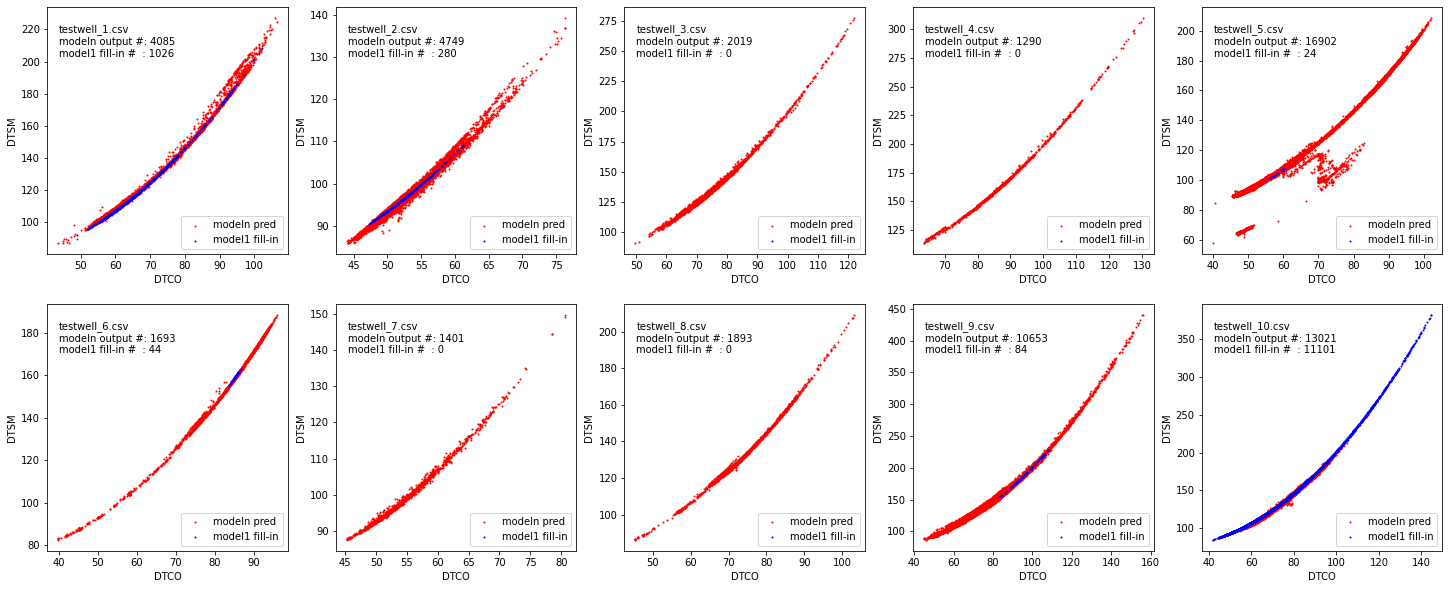

In [ ]:
f, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5*n_cols,5*n_rows),squeeze=False)
                                                                 
cols = ['GAMMA','RHO','DTCO']
for i, (r, s) in enumerate(zip(test_read, test_save)):
  data = pd. read_csv(r)

  X01 = data[['DTCO']].dropna(axis=0)
  X0n = data[cols].dropna(axis=0)
  
  X1 = scaler_x1.transform(X01)
  Xn = scaler_xn.transform(X0n)
  
  X1 = np.hstack((X1,(X1[:,-1].reshape(-1,1))**2))
  Xn = np.hstack((Xn,(Xn[:,-1].reshape(-1,1))**2))
  
  pred1 = model_x1.predict(X1)
  predn = model_xn.predict(Xn)

  df_pred1 = pd.DataFrame(pred1, index=X01.index, columns=['DTSM'])
  df_predn = pd.DataFrame(predn, index=X0n.index, columns=['DTSM'])
  
  df_out1 = data[['Depth']].join(df_pred1)
  df_outn = data[['Depth']].join(df_predn)

  df_out = df_outn.copy()
  df_out['DTSM'][df_out['DTSM'].isna()] = df_out1['DTSM']   # fill in with predictin from model1
  df_fillin=df_out.copy()                                     
  df_fillin[df_outn['DTSM'].notnull()]=np.nan

  df_out.to_csv(s, index=False)

  i_row = i//5
  i_col = i%5 


  ax[i_row, i_col].scatter(data.DTCO, df_outn.DTSM, s=1, color='red', label='modeln pred')
  ax[i_row, i_col].scatter(data.DTCO, df_fillin.DTSM, s=1, color='blue', label='model1 fill-in')

  ax[i_row, i_col].set_xlabel("DTCO")
  ax[i_row, i_col].set_ylabel("DTSM")

  ax[i_row, i_col].text(0.05, 0.8, r + '\nmodeln output #: ' 
                        +str(df_predn.shape[0]) + '\nmodel1 fill-in #  : ' 
                        + str(df_pred1.shape[0] - df_predn.shape[0]),
                        transform=ax[i_row, i_col].transAxes)
  ax[i_row, i_col].legend(loc=4)
plt.show()

##QC

In [ ]:
x = pd. read_csv('testwell_10.csv')
y = pd. read_csv('testwell_pred_10.csv')

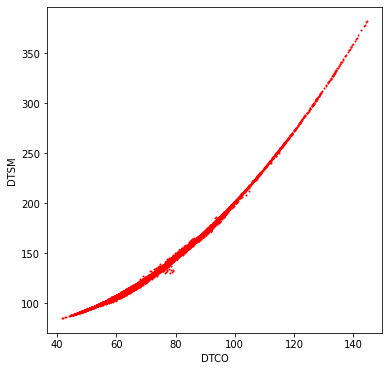

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

ax.scatter(x.DTCO, y.DTSM, s=1, color='red')

ax.set_xlabel("DTCO")
ax.set_ylabel("DTSM")


plt.show()

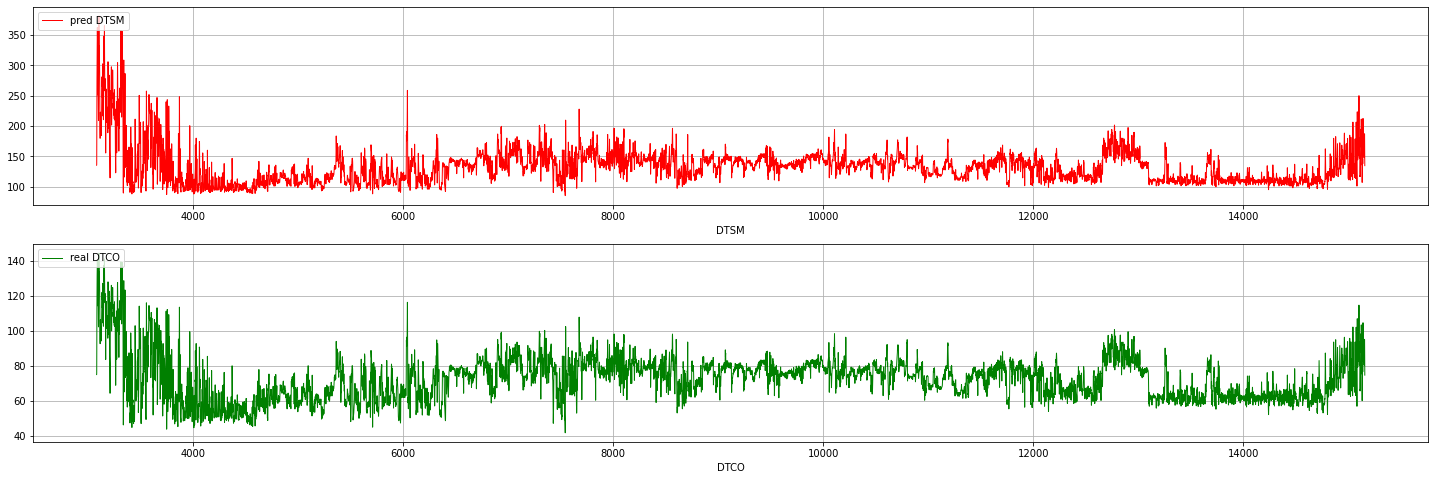

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(25,8))

l2, = ax1.plot(x.Depth, y.DTSM, color='red', linewidth=1, label='pred DTSM')
ax1.grid()
ax1.legend(loc='upper left')
  
ax1.set_xlabel("DTSM")

l3, = ax2.plot(x.Depth, x.DTCO, color='green',linewidth=1,label = 'real DTCO')

ax2.grid()
ax2.legend(loc='upper left')
ax2.set_xlabel("DTCO");
